<a href="https://colab.research.google.com/github/boseull/tensorflow_example/blob/main/tensorflow_%EA%B8%B0%EB%B3%B8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow, keras, numpy, plt 임포트

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


패션 데이터셋 불러오기. 레이블 0-9에 해당하는 각각의 클래스가 있음

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


데이터 셋에 클래스 이름이 없기 때문에 별도 변수를 만들어 저장

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##데이터 탐색

In [ ]:
#데이터셋 구조

print('train images : ' + str(train_images.shape))  ##train 이미지 28*28픽셀 60000장
print('train lables : ' + str(len(train_labels)) + '\n')  ##train 라벨 0-9까지 정수 60000개

print('test images : ' + str(test_images.shape))  ##train 이미지 28*28픽셀 60000장
print('test lables : ' + str(len(test_labels)))  ##train 라벨 0-9까지 정수 60000개

train images : (60000, 28, 28)
train lables : 60000

test images : (10000, 28, 28)
test lables : 10000


##데이터 전처리

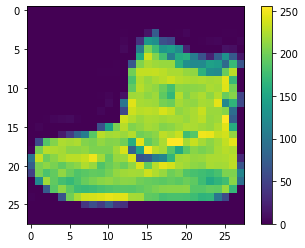

In [ ]:
#첫번째 이미지 확인

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
##0-255 사이의 값

In [ ]:
# 픽셀 값을 0-1 사이의 값으로 조정

train_images = train_images/255.0

test_images = test_images/255.0

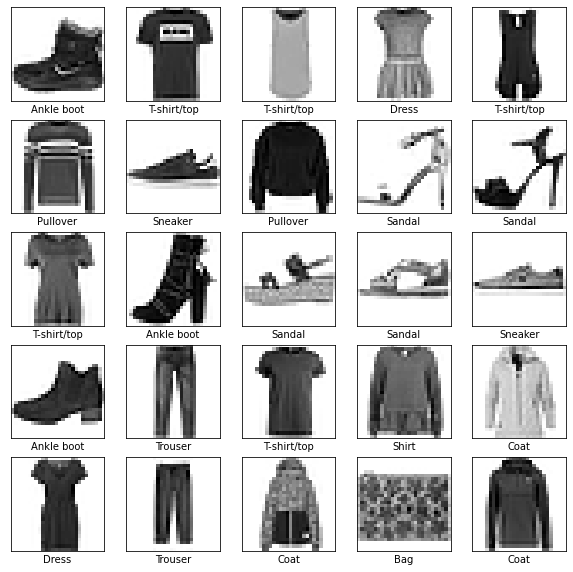

In [ ]:
#조정한 이미지와 클래스 이름 출력

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])#눈금 표시 : 안함
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) #cmap:그래프 색깔의 분위기, binary:흑백
  plt.xlabel(class_names[train_labels[i]])
plt.show()

##모델 구성

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



##훈련 및 평가

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8971
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9013
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9047
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9075
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2372 - accuracy: 0.9114


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('테스트 정확도 : ', test_acc)

## train_acc : 0.8917, test_acc : 0.8746 과대적합(overfitting) 때문

313/313 - 0s - loss: 0.3411 - accuracy: 0.8835
테스트 정확도 :  0.8834999799728394


##예측 만들기

array([5.2005916e-10, 5.3018033e-12, 3.3474064e-11, 4.2205857e-12,
       7.4663453e-10, 5.5502671e-05, 5.9238701e-08, 1.2173358e-03,
       3.4282686e-09, 9.9872714e-01], dtype=float32)

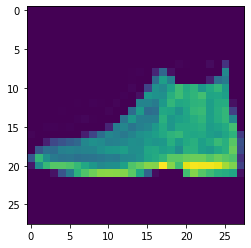

In [ ]:
predictions = model.predict(test_images)

plt.imshow(test_images[0])
predictions[0]

##예측 결과 보이기

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  #이미지 보여주기 + 예측라벨, 정확도, 실제라벨
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array) ##argmax : 최대값 index
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
  

def plot_value_array(i, predictions_array, true_label):
  #
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777') #회색
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

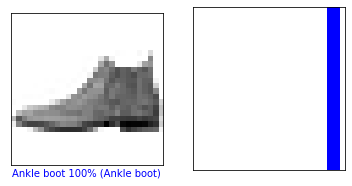

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

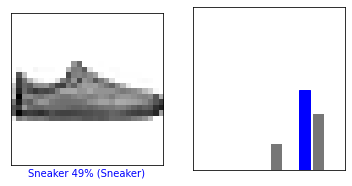

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

<function matplotlib.pyplot.show>

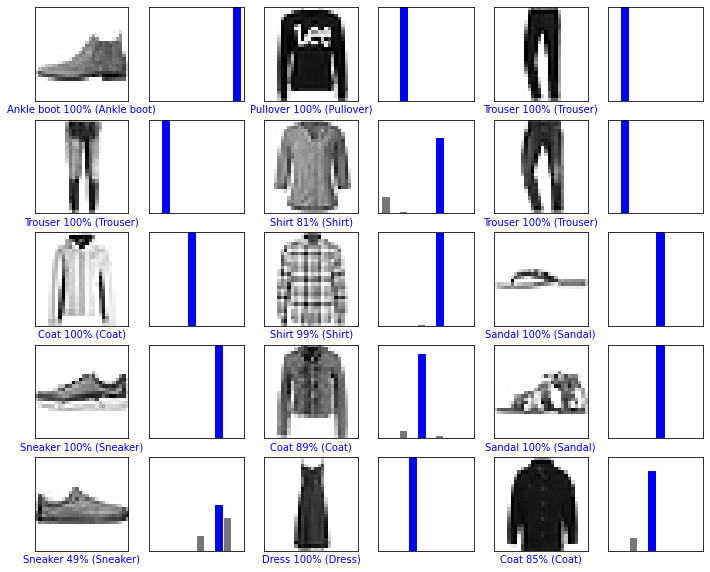

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show

##이미지 한 개만 예측

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.2006016e-10 5.3018033e-12 3.3474064e-11 4.2205857e-12 7.4663453e-10
  5.5502616e-05 5.9238815e-08 1.2173370e-03 3.4282621e-09 9.9872714e-01]]


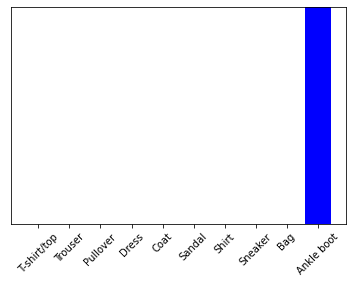

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)